In [1]:
import numpy as np
import pandas as pd


In [2]:
df=pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [3]:
df=df[['v1','v2']]

In [4]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [6]:
#find sentence string lenth
df['length'] = df["v2"].str.len()

In [7]:
df

,v1,v2,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161
5568,ham,Will Ì_ b going to esplanade fr home?,37
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [8]:
#find puncutation lenth
import re
def puncutation(text):
    value=re.findall(r'[!"\$%&\'()*+,\-.\/:;=#@?\[\\\]^_`{|}~]*',text)
    string = "".join(value)
    return len(string)

In [9]:
df['punct'] = df['v2'].apply(lambda x : puncutation(x))

In [10]:
df

,v1,v2,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,8
5568,ham,Will Ì_ b going to esplanade fr home?,37,2
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [11]:
df['v1'].unique()

array(['ham', 'spam'], dtype=object)

In [12]:
#unique value count in v1 coloumn
df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

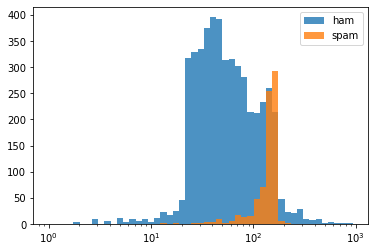

In [13]:
#visualization  v1 column data
import matplotlib.pyplot as plt
%matplotlib inline

plt.xscale('log')
bins=1.15**(np.arange(0,50))
plt.hist(df[df['v1']=='ham']['length'],bins=bins, alpha=0.8)
plt.hist(df[df['v1']=='spam']['length'],bins=bins, alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

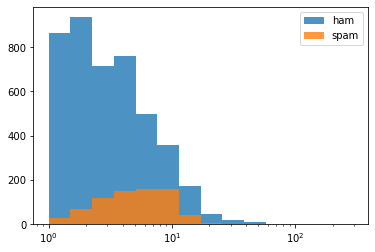

In [14]:
plt.xscale('log')
bins=1.5**(np.arange(0,15))
plt.hist(df[df['v1']=='ham']['punct'],bins=bins, alpha=0.8)
plt.hist(df[df['v1']=='spam']['punct'],bins=bins, alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
#X feature data
X=df[['length','punct']]
#y is our label
Y=df['v1']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=42)

In [17]:
X_train.shape

(3900, 2)

In [18]:
X_test.shape

(1672, 2)

# LogisticRegression

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
lr_model=LogisticRegression(solver='lbfgs')

In [21]:
lr_model.fit(X_train,Y_train)

LogisticRegression()

In [22]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [23]:
predictions=lr_model.predict(X_test)

In [24]:
predictions

array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [25]:
print(confusion_matrix(Y_test,predictions))

[[1395   58]
 [ 197   22]]


In [26]:
matrix=pd.DataFrame(confusion_matrix(Y_test,predictions),index=['ham','spam'],columns=['ham','spam'])

In [27]:
matrix

,ham,spam
ham,1395,58
spam,197,22


In [28]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

         ham       0.88      0.96      0.92      1453
        spam       0.28      0.10      0.15       219

    accuracy                           0.85      1672
   macro avg       0.58      0.53      0.53      1672
weighted avg       0.80      0.85      0.82      1672



In [29]:
print(accuracy_score(Y_test,predictions)*100)

84.74880382775119


# MultinomialNB model

In [30]:
from sklearn.naive_bayes import MultinomialNB
nb_model=MultinomialNB()
nb_model.fit(X_train,Y_train)
predictions=nb_model.predict(X_test)
print(accuracy_score(Y_test,predictions))
print(confusion_matrix(Y_test,predictions))

0.8648325358851675
[[1437   16]
 [ 210    9]]


In [31]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

         ham       0.87      0.99      0.93      1453
        spam       0.36      0.04      0.07       219

    accuracy                           0.86      1672
   macro avg       0.62      0.52      0.50      1672
weighted avg       0.81      0.86      0.82      1672



# Support vector machine

In [32]:
from sklearn.svm import SVC
svc_model=SVC(gamma='auto')
svc_model.fit(X_train,Y_train)
predictions=svc_model.predict(X_test)
print(accuracy_score(Y_test,predictions))
print(confusion_matrix(Y_test,predictions))

0.8917464114832536
[[1377   76]
 [ 105  114]]


# Decission tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
dtc_model=DecisionTreeClassifier()
dtc_model.fit(X_train,Y_train)
predictions=dtc_model.predict(X_test)
print(accuracy_score(Y_test,predictions))
print(confusion_matrix(Y_test,predictions))

0.8797846889952153
[[1356   97]
 [ 104  115]]


In [34]:
X=df['v2']

In [35]:
Y=df['v1']

In [36]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=42)

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

In [38]:
count_Vect=CountVectorizer()

In [39]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

In [40]:
#fit vactorizer to the data 
#count_Vect.fit(X_train)

In [41]:
#X_train_counts=count_Vect.transform(X_train)

In [42]:
#transfrom the original text message -> vector
X_train_counts=count_Vect.fit_transform(X_train)

In [43]:
X_train_counts

<3900x7206 sparse matrix of type '<class 'numpy.int64'>'
	with 51569 stored elements in Compressed Sparse Row format>

In [44]:
X_train.shape

(3900,)

In [45]:
X_train_counts.shape

(3900, 7206)

In [46]:
from sklearn.feature_extraction.text import TfidfTransformer

In [47]:
tfidf_tr=TfidfTransformer()

In [48]:
X_train_tfidf=tfidf_tr.fit_transform(X_train_counts)

In [49]:
X_train_tfidf.shape

(3900, 7206)

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [51]:
vector=TfidfVectorizer()

In [52]:
x_train_tfidf=vector.fit_transform(X_train)

In [53]:
x_train_tfidf.shape

(3900, 7206)

In [54]:
from sklearn.svm import LinearSVC

In [55]:
clf=LinearSVC()

In [56]:
clf.fit(X_train_tfidf,Y_train)

LinearSVC()

In [57]:
from sklearn.pipeline import Pipeline

In [58]:
text_clf= Pipeline([('tfidf', TfidfVectorizer()),('clf',LinearSVC())])

In [59]:
text_clf.fit(X_train,Y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [60]:
predictions=text_clf.predict(X_test)

In [61]:
predictions

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)

In [62]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1453
        spam       0.98      0.89      0.93       219

    accuracy                           0.98      1672
   macro avg       0.98      0.94      0.96      1672
weighted avg       0.98      0.98      0.98      1672



In [63]:
print(confusion_matrix(Y_test,predictions))

[[1450    3]
 [  25  194]]


In [64]:
print(accuracy_score(Y_test,predictions)*100)

98.32535885167464


In [65]:
text_clf.predict(["hi how are you"])

array(['ham'], dtype=object)

In [66]:
text_clf.predict(["Congratulation! You've selected as a winner. Text Won to 44255 Congratulation"])

array(['spam'], dtype=object)